In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import stop_words
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import autosklearn.classification
from sklearn.metrics import accuracy_score

class Data:
    def __init__(self, data):
      
        self.data = pd.read_csv(data)
    
    def createClasses(self):
        le = preprocessing.LabelEncoder()
        le.fit(self.data.party)
        self.data["Class"]=list(le.transform(self.data.party))

    def createPartitions(self):
        self.train_feature, self.test_feature, self.train_class, self.test_class = train_test_split(self.data.text, self.data.Class, test_size=0.20,random_state=1)
        
    def createVectors(self):
        vectorizer = TfidfVectorizer(use_idf=False, stop_words='english', min_df=3, max_df=0.9)
        self.trainvec = vectorizer.fit_transform(self.train_feature)
        self.testvec = vectorizer.transform(self.test_feature)
        
        self.datavec = vectorizer.fit_transform(self.data.text)
        
    
    def createClassifier(self, mode):
        # SINGLE CLASSIFIERS
        
        classifiers=["MultinomialNB", "KNeighborsClassifier", "Perceptron", "LinearSVC"]
        opt_classifiers=[]
        scores_array=[]
        
        #For each classifier (cls) we build an optimal version: opt_cls
        if (mode=="normal"):
            for cls in classifiers:
                opt_cls=self.optimizeClassifier(cls) 
                opt_classifiers.append(opt_cls)

                accuracy=opt_cls.best_score_
                scores_array.append(accuracy)

            #We fetch the best classifier amongst the optimal versions built previously
            max_acc=max(scores_array)
            index=scores_array.index(max_acc)
            best_cls=opt_classifiers[index]

            return best_cls

        #AUTOMATIC CLASSIFIER - EMSEMBLE
        if (mode=="auto"):
            classifier = autosklearn.classification.AutoSklearnClassifier()
            classifier.fit(self.trainvec, self.train_class)
            return [classifier, self.testvec, self.test_class]
    
    def optimizeClassifier(self, classifier):
        if (classifier=="MultinomialNB"):
            mnb=MultinomialNB()
            parameters = {"alpha": [0.1,0.5,1.0]}
            grid = GridSearchCV(mnb, param_grid=parameters, cv=10)

        if (classifier=="KNeighborsClassifier"):
            knn = KNeighborsClassifier()
            parameters = {"n_neighbors": range(1, 20, 2)}
            grid = GridSearchCV(knn, param_grid=parameters, cv=10)
        
        if (classifier=="Perceptron"):
            perc=Perceptron(max_iter=1000, tol=1e-3)
            parameters={"penalty": ('None', 'l2' , 'l1' , 'elasticnet')}
            grid = GridSearchCV(perc, param_grid=parameters, cv=10)
            
        if (classifier=="LinearSVC"):
            svc=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
            parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
            grid=GridSearchCV(svc, parameters, cv=10)
        
        grid.fit(self.datavec, self.data.Class)
        opt_cls=grid
        return  opt_cls
    

In [71]:
file=open("en_docs_clean.csv", "r")
data1 = Data(file)
data1.createClasses()
data1.createPartitions()
data1.createVectors()



In [72]:
classifier, testvec, testclass = data1.createClassifier("auto")
predictions = classifier.predict(testvec)
accuracy=accuracy_score(testclass, predictions)


/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2018-11-16 11:51:57,132:EnsembleBuilder(1):e6138fbfeb1329f21731b99f86171188] No models better than random - using Dummy Classifier!
[WARNING] [2018-11-16 11:51:57,143:EnsembleBuilder(1):e6138fbfeb1329f21731b99f86171188] No models better than random - using Dummy Classifier!
[WARNING] [2018-11-16 11:51:59,148:EnsembleBuilder(1):e6138fbfeb1329f21731b99f86171188] No models better than random - using Dummy Classifier!
[WARNING] [2018-11-16 11:52:01,152:EnsembleBuilder(1):e6138fbfeb1329f21731b99f86171188] No models better than random - using Dummy Classifier!
[WARNING] [2018-11-16 11:52:03,158:EnsembleBuilder(1):e6138fbfeb1329f21731b99f86171188] No models better than random - using Dummy Classifier!
[WARNING] [2018-11-16 11:52:05,163:EnsembleBuilder(1):e6138fbfeb1329f21731b99f86171188] No models better than random - using Dummy Classifier!
[WARNING] [2018-11-16 11:52:07,168:EnsembleBuilder(1):e6138fbfeb1329f21731b99f86171188] No models better than random - using Dummy Classifier!

/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-package

[WARNING] [2018-11-16 11:55:30,237:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-11-16 11:55:30,237:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-package

/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-package

/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-package

[WARNING] [2018-11-16 12:38:24,633:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-11-16 12:38:24,633:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/andreia/anaconda3/lib/python3.6/site-package

[WARNING] [2018-11-16 12:51:47,277:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2018-11-16 12:51:47,277:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger


In [73]:
print("Average accuracy:", accuracy)
print("parameters", classifier.cv_results_)

Average accuracy: 0.4892408846383742
parameters {'mean_test_score': array([0.43863225, 0.42164855, 0.        , 0.33152174, 0.15172101,
       0.        , 0.30661232, 0.38134058, 0.42481884, 0.        ,
       0.30525362, 0.37884964, 0.29370471, 0.21263587, 0.18070652,
       0.03781703, 0.18070652, 0.38903986, 0.25815217, 0.36616848,
       0.24116848, 0.21671196, 0.36413043, 0.38156703, 0.36480978,
       0.25679348, 0.1865942 , 0.31997283, 0.31634964, 0.35416667,
       0.3442029 , 0.        , 0.39039855, 0.22576993, 0.29234601,
       0.44950181, 0.30955616, 0.02377717, 0.2973279 , 0.17980072,
       0.44089674, 0.37047101, 0.44406703, 0.2665308 , 0.37341486,
       0.18342391, 0.17708333, 0.3607337 , 0.        , 0.31046196,
       0.36277174, 0.3125    , 0.41938406, 0.30955616, 0.36163949,
       0.3272192 , 0.34533514, 0.30865036, 0.        , 0.31770833,
       0.36503623, 0.27128623, 0.17934783, 0.43251812, 0.1865942 ,
       0.34556159, 0.18002717, 0.36277174, 0.21240942, 0.    

In [74]:
file=open("en_docs_clean.csv", "r")
data2 = Data(file)
data2.createClasses()
data2.createPartitions()
data2.createVectors()
classifier2=data2.createClassifier("normal")



In [75]:
e=classifier2.best_estimator_
s=classifier2.best_score_ 
p=classifier2.best_params_

print(e)
print(s)
print(p)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.3734305871098888
{'C': 1, 'kernel': 'linear'}


AxesSubplot(0.125,0.125;0.775x0.755)

COMPLETE INFO:
count                 16726
unique                   11
top       Liberal Democrats
freq                   3013
Name: party, dtype: object

INFO OF LIBERALS:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3013 entries, 17 to 10709
Data columns (total 5 columns):
text            3013 non-null object
manifesto_id    3013 non-null object
party           3013 non-null object
date            3013 non-null int64
title           3013 non-null object
dtypes: int64(1), object(4)
memory usage: 141.2+ KB

PERCENTAGE OF LIBERALS: 0.18013870620590697


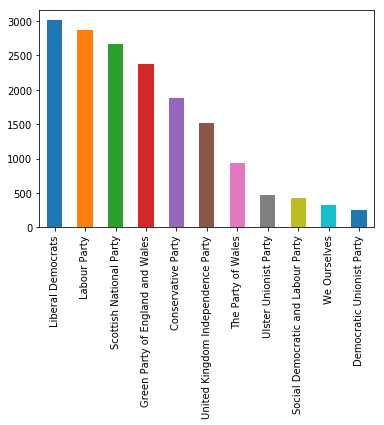

In [76]:
#Classes Distributions
file=open("en_docs_clean.csv", "r")
data3 = Data(file)
dist=data3.data.party.value_counts().plot.bar()
print(dist)

print()
print("COMPLETE INFO:")
print(data3.data.party.describe())
print()
Liberal=data3.data[data3.data.party=="Liberal Democrats"]
print("INFO OF LIBERALS:")
Liberal.info()

print()
print("PERCENTAGE OF LIBERALS:", 3013/16726)

In [ ]:
#Missing:
 #   - tuning do Tf idf:
  #      (stemmers e wrdvec2 e outros)
   # - evaluation
    #- metadata

In [ ]:
def createVectors(self, stopwords=False, useidf=False):
        if (stopwords==True):
            vectorizer = TfidfVectorizer(use_idf=useidf, stop_words='english', min_df=3, max_df=0.9)
        else:   
            vectorizer = TfidfVectorizer(use_idf=useidf, min_df=3, max_df=0.9)          

        self.trainvec = vectorizer.fit_transform(self.train_feature)
        self.testvec = vectorizer.transform(self.test_feature)

        self.datavec = vectorizer.fit_transform(self.data.text)

        
        
#stackoverflow
#tfidf = TfidfVectorizer(min_df=1, stop_words='english', analyzer='word', ngram_range=(1,1))
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
#https://stackoverflow.com/questions/26195699/sklearn-how-to-speed-up-a-vectorizer-eg-tfidfvectorizer
#https://pypi.org/project/PyStemmer/
#https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb